In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import collections
import os

colors = sns.color_palette('Set2', 20)

alphas=[0.001, 0.0001, 0.00001]
sns.set_context('poster')
sns.set_style('white')
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.major.size'] = 5
sns.set_palette('Paired', 20)

lgn_fontsize = plt.rcParams['legend.fontsize']
%matplotlib inline

In [2]:
backmapping_energies = collections.defaultdict(list)
fields = None
for f in sorted(filter(lambda x: x.endswith('xvg'), os.listdir('backmapping_energy/')), key=lambda x: int(x.split('_')[2].replace('.xvg', ''))):
    if not f.endswith('xvg'):
        continue
    alp = float(f.split('_')[1])
    print(alp)
    d = np.loadtxt(os.path.join('backmapping_energy/', f), skiprows=1)
    fields = {x: k for k, x in enumerate(open(os.path.join('backmapping_energy/', f), 'r').readline().split())}
    backmapping_energies[alp].append(d)

0.001
0.0001
1e-05
0.0001
1e-05
0.001
0.001
0.0001
1e-05
0.001
0.0001
1e-05
1e-05
0.0001
0.001
0.001
1e-05
0.0001
0.0001
0.001
0.0001
0.001


## Potential energy

In [3]:
pot_fields = [v for k, v in fields.items() if ('angle' in k or 'bond' in k or 'dih' in k or 'lj' in k or 'tab' in k) and not 'angle_253' in k]
angle_fields = [v for k, v in fields.items() if 'angle' in k and not 'angle_253' in k]
bond_fields = [v for k, v in fields.items() if 'bond' in k]
dih_fields = [v for k, v in fields.items() if 'dih' in k]
nonbond_fields = [v for k, v in fields.items() if 'lj' in k or 'tab' in k]
tot_pot_fields = angle_fields + bond_fields + dih_fields + nonbond_fields

In [4]:
total_bond_energy7 = {}
total_angle_energy7 = {}
total_dih_energy7 = {}
total_nonbond_energy7 = {}
total_pot_energy7 = {}
for alp in backmapping_energies.keys():
    ss = []
    s = backmapping_energies[alp]
    for s1 in s:
        sum_f = np.sum(s1[:, bond_fields], axis=1)
        ss.append(np.column_stack((s1[:, fields['time']], sum_f)))
    total_bond_energy7[alp] = np.array(ss)
    
    ss = []
    for s1 in s:
        sum_f = np.sum(s1[:, angle_fields], axis=1)
        ss.append(np.column_stack((s1[:, fields['time']], sum_f)))
    total_angle_energy7[alp] = np.array(ss)
    
    ss = []
    for s1 in s:
        sum_f = np.sum(s1[:, dih_fields], axis=1)
        ss.append(np.column_stack((s1[:, fields['time']], sum_f)))
    total_dih_energy7[alp] = np.array(ss)
    
    ss = []
    for s1 in s:
        sum_f = np.sum(s1[:, nonbond_fields], axis=1)
        ss.append(np.column_stack((s1[:, fields['time']], sum_f)))
    total_nonbond_energy7[alp] = np.array(ss)
    
    ss = []
    for s1 in s:
        sum_f = np.sum(s1[:, tot_pot_fields], axis=1)
        ss.append(np.column_stack((s1[:, fields['time']], sum_f)))
    total_pot_energy7[alp] = np.array(ss)

0.001 2.41495453104
0.0001 2.15556091639
1e-05 8.15705896527


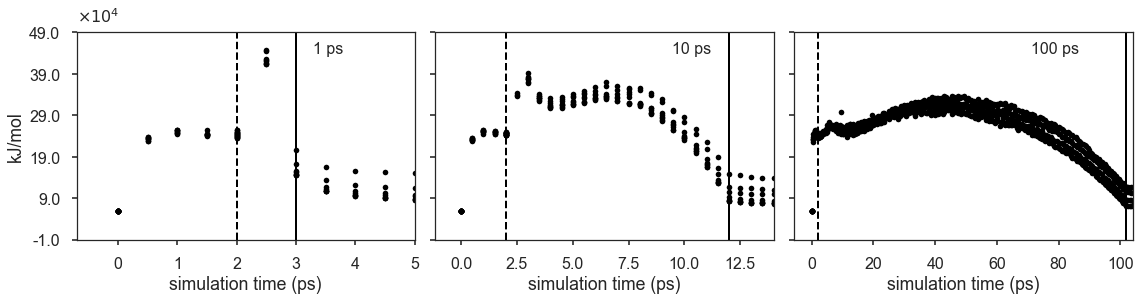

In [5]:
plt.rcParams['figure.figsize'] = (16, 4)
ymin, ymax, ystep = -10000, 400000, 100000
multiply = 10**4
for i, alp in enumerate(sorted(backmapping_energies.keys(), reverse=True), 1):
    plt.subplot(1,3,i)
    epot = []
    for j, s in enumerate(total_pot_energy7[alp]):
        l, = plt.plot(s[:, 0], s[:, 1]/multiply, 'k.')
        epot.append(np.average(s[:, 1][-1]/multiply))
    print(alp, np.std(epot))
    plt.annotate('{:.0f} ps'.format(1/alp/1000), xy=(0.7, 0.9), xycoords='axes fraction', fontsize=lgn_fontsize)
    plt.axvline(x=2, linewidth=2.0, linestyle='--', color='k')
    plt.axvline(x=2+(1.0/alp/1000), linewidth=2.0, linestyle='-', color='k')
    plt.ylim([ymin/multiply, ymax/multiply])
    plt.xlim(xmax=2+(1.0/alp/1000)+2)
    yticks = np.arange(ymin, ymax+ystep, ystep)/multiply
    plt.yticks(yticks, [])
    #plt.xlim([0, 10000])
    if i == 1:
        plt.yticks(yticks, yticks)
        plt.ylabel(r'kJ/mol')
        plt.annotate(r'$\times 10^4$'.format(multiply), xy=(0, 1.05), xycoords='axes fraction', fontsize=lgn_fontsize)
    else:
        plt.yticks(yticks, [])
    plt.xlabel('simulation time (ps)')
#plt.xlim([0, 1200])
plt.tight_layout()
plt.savefig('ab2_aa_potential_bck.pdf', dpi=200, bbox_inches='tight')

In [6]:
gmx_pot_energy = collections.defaultdict(list)
for f in os.listdir('eq_energy/'):
    if f.endswith('xvg'):
        alpha = float(f.split('_')[1])
        d = np.loadtxt(os.path.join('eq_energy', f), comments=('@', '#'))
        gmx_pot_energy[alpha].append(d)

In [7]:
eq_header = {
    'time': 0,
    "bond": 1,
    "angle": 2,
    "propdih": 3,
    "rb_dih": 4,
    "lj-14": 5,
    "coulomb-14": 6,
    "lj": 7, 
    "coulomb": 8,
    "potential": 10
}

0.001 0 -66845.1081491
0.001 1 -85500.7784819
0.001 2 -92101.9391866
0.001 3 -82023.0323354
0.0001 0 -71043.5133176
0.0001 1 -91611.6976785
0.0001 2 -85967.4194348
0.0001 3 -58526.2343047
1e-05 0 -92184.0592282
1e-05 1 -61245.9381188
1e-05 2 -91842.8168767
1e-05 3 -80253.2701384


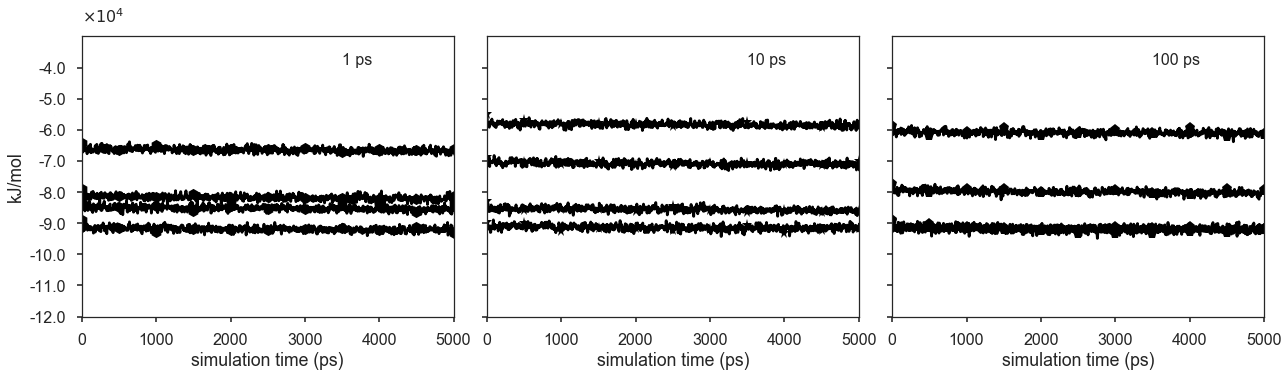

In [8]:
plt.rcParams['figure.figsize'] = (18, 5)
pot = 'potential'
multiply = 10**4
markers = ['d', 'h', '*', 'p']
ymin, ymax, ystep = -120000, -30000, 10000
for i, (alp, l) in enumerate(sorted(gmx_pot_energy.items(), reverse=True), 1):
    plt.subplot(1,3,i)
    for d, s in enumerate(l):
        k, = plt.plot(s[:, 0], s[:, eq_header[pot]]/multiply, marker=markers[i], markevery=100, color='k')
        print(alp, d, np.average(s[:, eq_header[pot]]))
    l = np.array(l)
    avg_pot = np.average(l, axis=0)[:, eq_header[pot]]
    var_pot = np.var(l, axis=0)[:, eq_header[pot]]
    plt.annotate('{:.0f} ps'.format(1/alp/1000), xy=(0.7, 0.9), xycoords='axes fraction', fontsize=lgn_fontsize)
    plt.ylim([ymin/multiply, ymax/multiply])
    yticks = np.arange(ymin/multiply, (ymax)/multiply, ystep/multiply)
    plt.xlim([0, 5000])
    if i == 1:
        plt.yticks(yticks, yticks)
        plt.ylabel(r'kJ/mol'.format(pot))
        plt.annotate(r'$\times 10^4$'.format(multiply), xy=(0, 1.05), xycoords='axes fraction', fontsize=lgn_fontsize)
    else:
        plt.yticks(yticks, [])
    plt.xlabel('simulation time (ps)')        
    
plt.tight_layout()
plt.savefig('ab2_aa_eq_potential.pdf', dpi=200, bbox_inches='tight')

In [9]:
RT = 0.0083144621 * 298.0
bonds = 38030

0.001 0.625551045001 0.0616432835969 0.168134482569
0.0001 0.659281580022 0.0889309097782 0.228327301826
1e-05 0.629666328858 0.0886252062389 0.217207902202


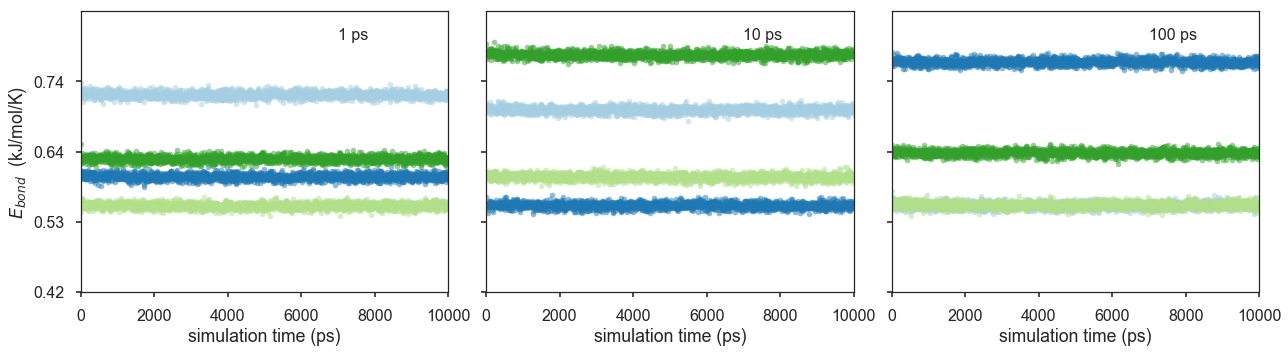

In [10]:
plt.rcParams['figure.figsize'] = (18, 5)
pot = 'bond'
multiply = RT*bonds
ymin, ymax, ystep = 40000, 80000, 10000
for i, (alp, l) in enumerate(sorted(gmx_pot_energy.items(), reverse=True), 1):
    plt.subplot(1,3,i)
    e_vals = []
    for d, s in enumerate(l):
        k, = plt.plot(s[:, 0], s[:, eq_header[pot]]/multiply, '.', alpha=0.5)
        #print(alp, d, np.average(s[:, eq_header[pot]]))
        e_vals.append(np.average(s[:, eq_header[pot]]))
    print(alp, np.average(e_vals)/multiply, np.std(e_vals)/multiply, (np.max(e_vals)-np.min(e_vals))/multiply)
    l = np.array(l)
    avg_pot = np.average(l, axis=0)[:, eq_header[pot]]
    var_pot = np.var(l, axis=0)[:, eq_header[pot]]
    plt.annotate('{:.0f} ps'.format(1/alp/1000), xy=(0.7, 0.9), xycoords='axes fraction', fontsize=lgn_fontsize)
    #plt.annotate(r'$\langle E_{{{}}} \rangle = {:.2e} \pm {:.2e}$'.format(
    #    pot, np.average(avg_pot), np.sqrt(np.average(var_pot))), 
    #             fontsize=lgn_fontsize,  xy=(0.02, 0.05), xycoords='axes fraction')
    plt.ylim([ymin/multiply, ymax/multiply])
    yticks = np.arange(ymin/multiply, (ymax)/multiply, ystep/multiply)
    plt.xlim([0, 10000])
    if i == 1:
        plt.yticks(yticks, map('{:.2f}'.format, yticks))
        plt.ylabel(r'$E_{{{}}}$  (kJ/mol/K)'.format(pot))
    else:
        plt.yticks(yticks, [])
    plt.xlabel('simulation time (ps)')        
    
plt.tight_layout()
plt.savefig('ab2_aa_eq_{}.pdf'.format(pot), dpi=200, bbox_inches='tight')

0.001 0.336885342106 0.000611303157883 0.00151092015169
0.0001 0.338473277616 0.00239044148936 0.00568232247403
1e-05 0.337257942627 0.00188830376028 0.00466947845212


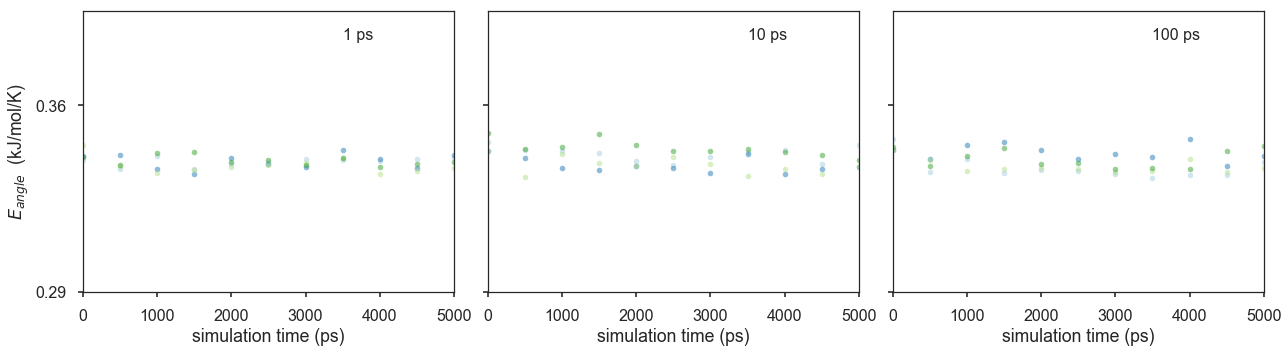

In [16]:
plt.rcParams['figure.figsize'] = (18, 5)
pot = 'angle'
m = 62060*RT
ymin, ymax, ystep = 45000, 60000, 10000
for i, (alp, l) in enumerate(sorted(gmx_pot_energy.items(), reverse=True), 1):
    plt.subplot(1,3,i)
    e_vals = []
    for s in l:
        e_vals.append(np.average(s[:, eq_header[pot]]))
        k, = plt.plot(s[:, 0], s[:, eq_header[pot]]/m, '.', markevery=100, alpha=0.5)
    print(alp, np.average(e_vals)/m, np.std(e_vals)/m, (np.max(e_vals)-np.min(e_vals))/m)
    l = np.array(l)
    avg_pot = np.average(l, axis=0)[:, eq_header[pot]]
    plt.annotate('{:.0f} ps'.format(1/alp/1000), xy=(0.7, 0.9), xycoords='axes fraction', fontsize=lgn_fontsize)
    #plt.annotate(r'$\langle E_{{{}}} \rangle = {:.2f} \; kJ/mol$'.format(pot, np.average(avg_pot)), 
    #             fontsize=lgn_fontsize,  xy=(0.05, 0.02), xycoords='axes fraction')
    plt.ylim([ymin/m, ymax/m])
    yticks = np.arange(ymin/m, ymax/m, ystep/m)
    if i == 1:
        plt.ylabel(r'$E_{{{}}}$  (kJ/mol/K)'.format(pot))
        #plt.annotate(r'$\times 10^4$'.format(m), xy=(0, 1.05), xycoords='axes fraction', fontsize=lgn_fontsize)
        plt.yticks(yticks, map('{:.2f}'.format, yticks))
    else:        
        plt.yticks(yticks, [])
    plt.xlim([0, 5000])
    plt.xlabel('simulation time (ps)')            
    
plt.tight_layout()
plt.savefig('ab2_aa_eq_{}.pdf'.format(pot), dpi=200, bbox_inches='tight')

0.001 0.129316136194 0.00024730118263 0.000666004372568
0.0001 0.12997948334 0.000700414724621 0.00177158428196
1e-05 0.13054365113 0.000667625850071 0.00169190932961


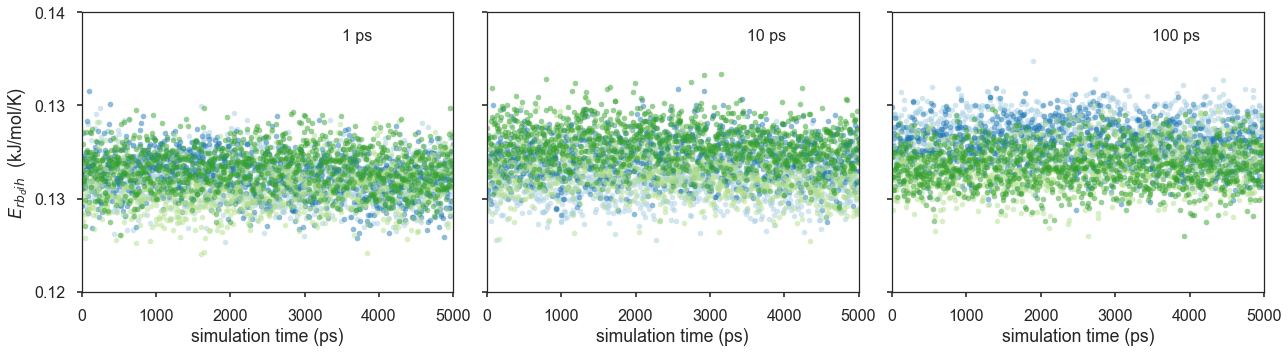

In [17]:
plt.rcParams['figure.figsize'] = (18, 5)
pot = 'rb_dih'
m = 91120*RT
ymin, ymax, ystep = 28000, 31000, 1000
for i, (alp, l) in enumerate(sorted(gmx_pot_energy.items(), reverse=True), 1):
    plt.subplot(1,3,i)
    e_vals = []
    for s in l:
        e_vals.append(np.average(s[:, eq_header[pot]]))
        k, = plt.plot(s[:, 0], s[:, eq_header[pot]]/m, '.', alpha=0.5)
    print(alp, np.average(e_vals)/m, np.std(e_vals)/m, (np.max(e_vals)-np.min(e_vals))/m)
    l = np.array(l)
    avg_pot = np.average(l, axis=0)[:, eq_header[pot]]
    plt.annotate('{:.0f} ps'.format(1/alp/1000), xy=(0.7, 0.9), xycoords='axes fraction', fontsize=lgn_fontsize)
    #plt.annotate(r'$\langle E_{{{}}} \rangle = {:.2f} \; kJ/mol$'.format(pot, np.average(avg_pot)), 
    #             fontsize=lgn_fontsize,  xy=(0.05, 0.02), xycoords='axes fraction')
    plt.ylim([ymin/m, ymax/m])
    yticks = np.arange(ymin/m, ymax/m, ystep/m)
    if i == 1:
        plt.ylabel(r'$E_{{{}}}$  (kJ/mol/K)'.format(pot))
        #plt.annotate(r'$\times 10^4$'.format(m), xy=(0, 1.05), xycoords='axes fraction', fontsize=lgn_fontsize)
        plt.yticks(yticks, map('{:.2f}'.format, yticks))
    else:        
        plt.yticks(yticks, [])
    plt.xlim([0, 5000])
    plt.xlabel('simulation time (ps)')        
    
plt.tight_layout()
plt.savefig('ab2_aa_eq_{}.pdf'.format(pot), dpi=200, bbox_inches='tight')

0.001 0 58116.9301951
0.001 1 58219.6179293
0.001 2 58295.7738553
0.001 3 58295.71573
0.0001 0 58134.2456096
0.0001 1 58206.2451684
0.0001 2 58185.6854698
0.0001 3 58164.0947378
1e-05 0 58280.1944223
1e-05 1 58135.384179
1e-05 2 58164.6282718
1e-05 3 58167.8679703


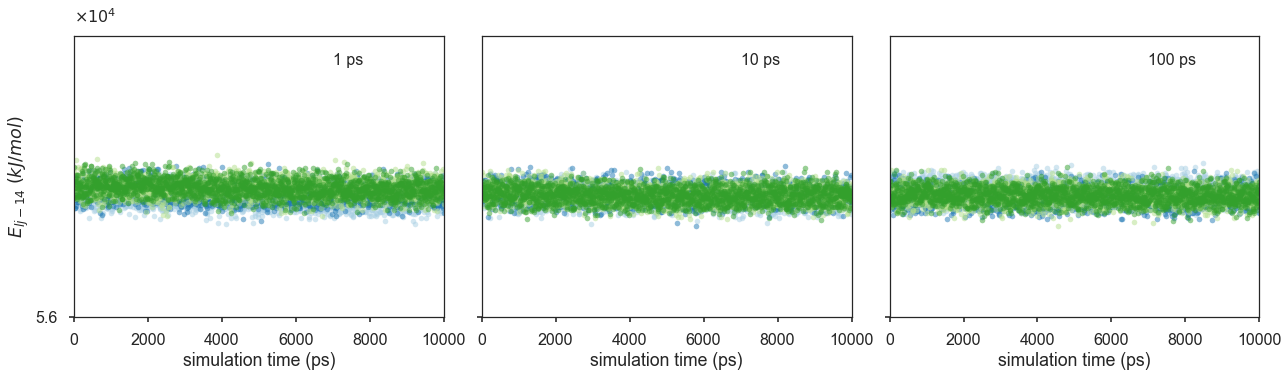

In [18]:
plt.rcParams['figure.figsize'] = (18, 5)
pot = 'lj-14'
multiply = 10**4
ymin, ymax, ystep = 56000, 61000, 10000
for i, (alp, l) in enumerate(sorted(gmx_pot_energy.items(), reverse=True), 1):
    plt.subplot(1,3,i)
    for d, s in enumerate(l):
        k, = plt.plot(s[:, 0], s[:, eq_header[pot]]/multiply, '.', alpha=0.5)
        print(alp, d, np.average(s[:, eq_header[pot]]))
    l = np.array(l)
    avg_pot = np.average(l, axis=0)[:, eq_header[pot]]
    var_pot = np.var(l, axis=0)[:, eq_header[pot]]
    plt.annotate('{:.0f} ps'.format(1/alp/1000), xy=(0.7, 0.9), xycoords='axes fraction', fontsize=lgn_fontsize)
    #plt.annotate(r'$\langle E_{{{}}} \rangle = {:.2e} \pm {:.2e}$'.format(
    #    pot, np.average(avg_pot), np.sqrt(np.average(var_pot))), 
    #             fontsize=lgn_fontsize,  xy=(0.02, 0.05), xycoords='axes fraction')
    plt.ylim([ymin/multiply, ymax/multiply])
    yticks = np.arange(ymin/multiply, (ymax)/multiply, ystep/multiply)
    plt.xlim([0, 10000])
    if i == 1:
        plt.yticks(yticks, yticks)
        plt.ylabel(r'$E_{{{}}} \; (kJ/mol)$'.format(pot))
        plt.annotate(r'$\times 10^4$'.format(multiply), xy=(0, 1.05), xycoords='axes fraction', fontsize=lgn_fontsize)
    else:
        plt.yticks(yticks, [])
    plt.xlabel('simulation time (ps)')        
    
plt.tight_layout()
plt.savefig('ab2_aa_eq_{}.pdf'.format(pot), dpi=200, bbox_inches='tight')

0.001 0 160637.40333
0.001 1 160767.586793
0.001 2 160754.152033
0.001 3 160665.733985
0.0001 0 160798.645529
0.0001 1 161038.996338
0.0001 2 161078.567708
0.0001 3 160893.5439
1e-05 0 161691.700533
1e-05 1 161376.830546
1e-05 2 161445.077617
1e-05 3 161340.552872


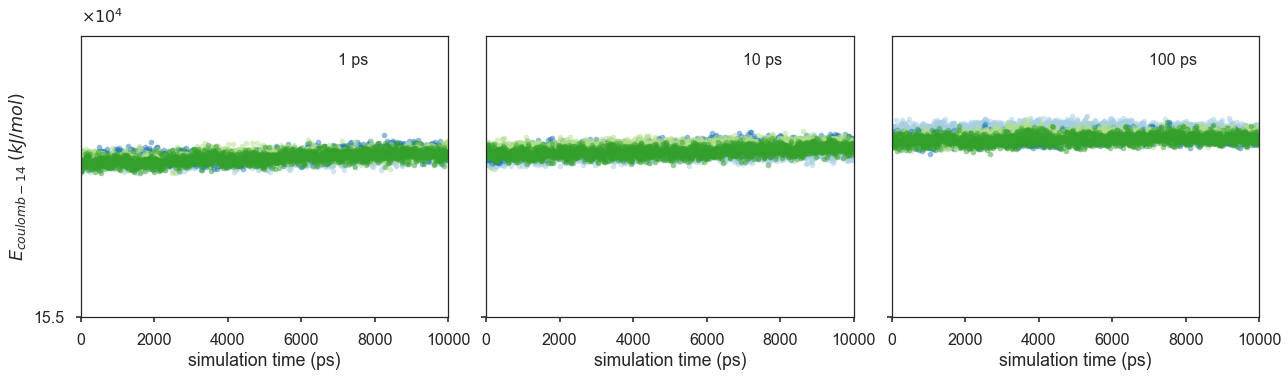

In [19]:
plt.rcParams['figure.figsize'] = (18, 5)
pot = 'coulomb-14'
multiply = 10**4
ymin, ymax, ystep = 155000, 165000, 10000
for i, (alp, l) in enumerate(sorted(gmx_pot_energy.items(), reverse=True), 1):
    plt.subplot(1,3,i)
    for d, s in enumerate(l):
        k, = plt.plot(s[:, 0], s[:, eq_header[pot]]/multiply, '.', alpha=0.5)
        print(alp, d, np.average(s[:, eq_header[pot]]))
    l = np.array(l)
    avg_pot = np.average(l, axis=0)[:, eq_header[pot]]
    var_pot = np.var(l, axis=0)[:, eq_header[pot]]
    plt.annotate('{:.0f} ps'.format(1/alp/1000), xy=(0.7, 0.9), xycoords='axes fraction', fontsize=lgn_fontsize)
    #plt.annotate(r'$\langle E_{{{}}} \rangle = {:.2e} \pm {:.2e}$'.format(
    #    pot, np.average(avg_pot), np.sqrt(np.average(var_pot))), 
    #             fontsize=lgn_fontsize,  xy=(0.02, 0.05), xycoords='axes fraction')
    plt.ylim([ymin/multiply, ymax/multiply])
    yticks = np.arange(ymin/multiply, (ymax)/multiply, ystep/multiply)
    plt.xlim([0, 10000])
    if i == 1:
        plt.yticks(yticks, yticks)
        plt.ylabel(r'$E_{{{}}} \; (kJ/mol)$'.format(pot))
        plt.annotate(r'$\times 10^4$'.format(multiply), xy=(0, 1.05), xycoords='axes fraction', fontsize=lgn_fontsize)
    else:
        plt.yticks(yticks, [])
    plt.xlabel('simulation time (ps)')        
    
plt.tight_layout()
plt.savefig('ab2_aa_eq_{}.pdf'.format(pot), dpi=200, bbox_inches='tight')

0.001 0 -356155.763931
0.001 1 -357088.823479
0.001 2 -356827.815514
0.001 3 -356710.371018
0.0001 0 -357020.619768
0.0001 1 -357227.952617
0.0001 2 -357514.180051
0.0001 3 -356858.802364
1e-05 0 -358686.396349
1e-05 1 -358024.448947
1e-05 2 -358334.45446
1e-05 3 -357771.377015


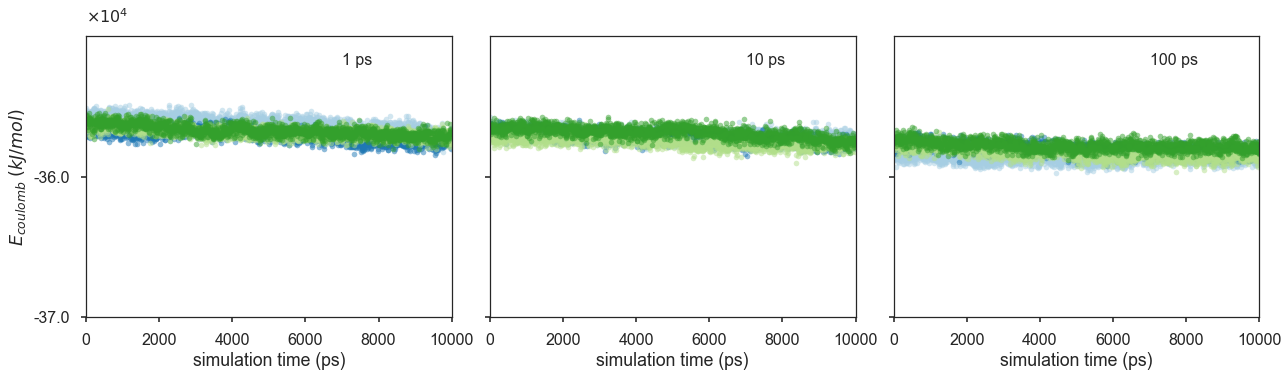

In [20]:
plt.rcParams['figure.figsize'] = (18, 5)
pot = 'coulomb'
multiply = 10**4
ymin, ymax, ystep = -370000, -350000, 10000
for i, (alp, l) in enumerate(sorted(gmx_pot_energy.items(), reverse=True), 1):
    plt.subplot(1,3,i)
    for d, s in enumerate(l):
        k, = plt.plot(s[:, 0], s[:, eq_header[pot]]/multiply, '.', alpha=0.5)
        print(alp, d, np.average(s[:, eq_header[pot]]))
    l = np.array(l)
    avg_pot = np.average(l, axis=0)[:, eq_header[pot]]
    var_pot = np.var(l, axis=0)[:, eq_header[pot]]
    plt.annotate('{:.0f} ps'.format(1/alp/1000), xy=(0.7, 0.9), xycoords='axes fraction', fontsize=lgn_fontsize)
    #plt.annotate(r'$\langle E_{{{}}} \rangle = {:.2e} \pm {:.2e}$'.format(
    #    pot, np.average(avg_pot), np.sqrt(np.average(var_pot))), 
    #             fontsize=lgn_fontsize,  xy=(0.02, 0.05), xycoords='axes fraction')
    plt.ylim([ymin/multiply, ymax/multiply])
    yticks = np.arange(ymin/multiply, (ymax)/multiply, ystep/multiply)
    plt.xlim([0, 10000])
    if i == 1:
        plt.yticks(yticks, yticks)
        plt.ylabel(r'$E_{{{}}} \; (kJ/mol)$'.format(pot))
        plt.annotate(r'$\times 10^4$'.format(multiply), xy=(0, 1.05), xycoords='axes fraction', fontsize=lgn_fontsize)
    else:
        plt.yticks(yticks, [])
    plt.xlabel('simulation time (ps)')        
    
plt.tight_layout()
plt.savefig('ab2_aa_eq_{}.pdf'.format(pot), dpi=200, bbox_inches='tight')

0.001 0 -84994.5035841
0.001 1 -91059.4230502
0.001 2 -93766.6541846
0.001 3 -90748.5661466
0.0001 0 -86742.251062
0.0001 1 -93343.1524004
0.0001 2 -91216.8340439
0.0001 3 -82956.4941358
1e-05 0 -93482.0613638
1e-05 1 -83740.6513111
1e-05 2 -92813.4568068
1e-05 3 -89243.5332841


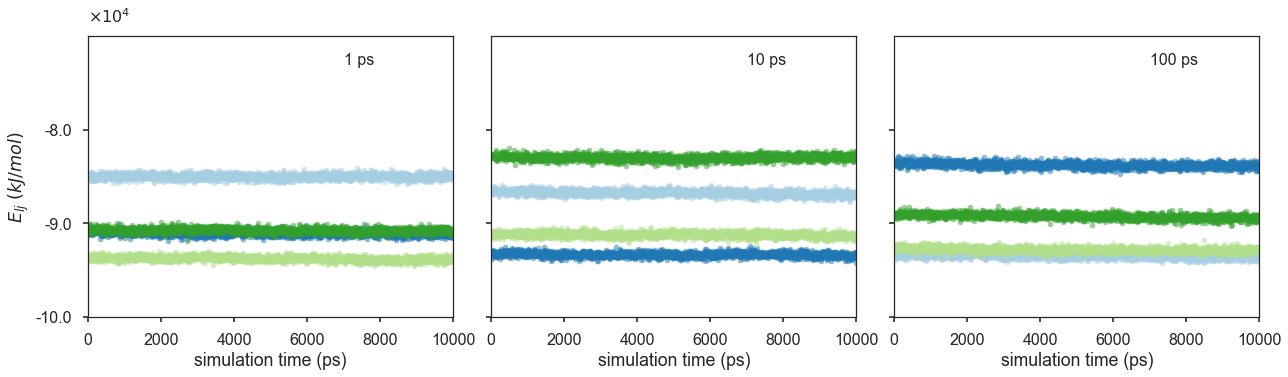

In [21]:
plt.rcParams['figure.figsize'] = (18, 5)
pot = 'lj'
multiply = 10**4
ymin, ymax, ystep = -100000, -70000, 10000
for i, (alp, l) in enumerate(sorted(gmx_pot_energy.items(), reverse=True), 1):
    plt.subplot(1,3,i)
    for d, s in enumerate(l):
        k, = plt.plot(s[:, 0], s[:, eq_header[pot]]/multiply, '.', alpha=0.5)
        print(alp, d, np.average(s[:, eq_header[pot]]))
    l = np.array(l)
    avg_pot = np.average(l, axis=0)[:, eq_header[pot]]
    var_pot = np.var(l, axis=0)[:, eq_header[pot]]
    plt.annotate('{:.0f} ps'.format(1/alp/1000), xy=(0.7, 0.9), xycoords='axes fraction', fontsize=lgn_fontsize)
    #plt.annotate(r'$\langle E_{{{}}} \rangle = {:.2e} \pm {:.2e}$'.format(
    #    pot, np.average(avg_pot), np.sqrt(np.average(var_pot))), 
    #             fontsize=lgn_fontsize,  xy=(0.02, 0.05), xycoords='axes fraction')
    plt.ylim([ymin/multiply, ymax/multiply])
    yticks = np.arange(ymin/multiply, (ymax)/multiply, ystep/multiply)
    plt.xlim([0, 10000])
    if i == 1:
        plt.yticks(yticks, yticks)
        plt.ylabel(r'$E_{{{}}} \; (kJ/mol)$'.format(pot))
        plt.annotate(r'$\times 10^4$'.format(multiply), xy=(0, 1.05), xycoords='axes fraction', fontsize=lgn_fontsize)
    else:
        plt.yticks(yticks, [])
    plt.xlabel('simulation time (ps)')        
    
plt.tight_layout()
plt.savefig('ab2_aa_eq_{}.pdf'.format(pot), dpi=200, bbox_inches='tight')

# RDF

In [11]:
import numpy
def smooth(x,window_len=20,window='hanning'):
    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=numpy.r_[x[window_len-1:0:-1],x,x[-1:-window_len:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y

In [12]:
rdfs = collections.defaultdict(dict) # at_name: alpha: rdfs
for f in sorted(os.listdir('rdf')):
    if f.endswith('xvg') and f.startswith('rdf'):
        t = f.split('_')
        at_name = '_'.join(t[3:]).replace('.xvg', '')
        d = np.loadtxt(os.path.join('rdf', f), comments=('@', '#'))
        alpha = float(t[2])
        if alpha not in rdfs[at_name]:
            rdfs[at_name][alpha] = []
        rdfs[at_name][alpha].append(d)

In [13]:
avg_rdfs = collections.defaultdict(dict)
for at_name in rdfs:
    for i, (alpha, l) in enumerate(sorted(rdfs[at_name].items(), reverse=True), 1):
        avg_l = np.average(l, axis=0)
        std_l = np.std(l, axis=0)
        s = np.zeros((avg_l.shape[0], avg_l.shape[1]+1))
        s[:, (0, 1)] = avg_l
        s[:, 2] = std_l[:, 1]
        if at_name == 'ring_ring':
            r = 150
            ee = s[:r][:, 1]
            ee[ee > 0.02] = 0.0
            s[:r][:, 1] = ee
        avg_rdfs[at_name][alpha] = s

In [14]:
avg_rdfs.keys()

dict_keys(['C_H', 'C_O', 'C_O_excl', 'O2_C12_C17', 'O_H', 'ring_ring'])

1e-05 0.0001 0.00660358803985
1e-05 0.001 0.0111555871652
0.0001 0.001 0.00769236634593
0.00848384718365


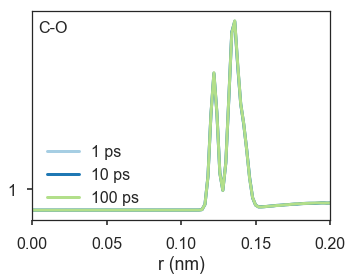

In [16]:
plt.rcParams['figure.figsize'] = (5, 4)
at_name = 'C_O'
for alp, d in sorted(avg_rdfs[at_name].items(), reverse=True):
    plt.plot(d[:, 0], d[:, 1], label='{:.0f} ps'.format(1.0/alp/1000), linewidth=3)
    plt.xlim([0, 0.6])
plt.legend(loc=3)
alps = sorted(avg_rdfs[at_name].keys())
rmses = []
for a1 in range(len(alps)):
    d1 = avg_rdfs[at_name][alps[a1]]
    for a2 in range(a1+1, len(alps)):
        d2 = avg_rdfs[at_name][alps[a2]]
        rmse = np.sqrt(np.average(pow(d2[:, 1]-d1[:, 1], 2)))
        rmses.append(rmse)
        print(alps[a1], alps[a2], rmse)
print(np.average(rmses))
plt.xlim([0, 0.2])
plt.annotate(at_name.replace('_', '-'), xy=(0.02, 0.9), xycoords='axes fraction', fontsize=16)
plt.xlabel('r (nm)')
plt.yticks([1])
plt.tight_layout()
plt.savefig('ab2_rdf_c_o.pdf', dpi=200)

1e-05 0.0001 0.0038322643437
1e-05 0.001 0.00535559481602
0.0001 0.001 0.00317452424257
0.00412079446743


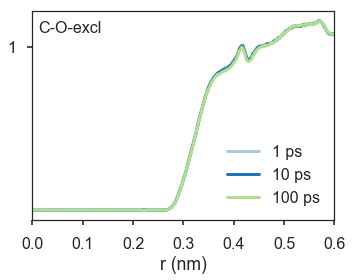

In [18]:
plt.rcParams['figure.figsize'] = (5, 4)
at_name = 'C_O_excl'
for alp, d in sorted(avg_rdfs[at_name].items(), reverse=True):
    plt.plot(d[:, 0], d[:, 1], label='{:.0f} ps'.format(1.0/alp/1000), linewidth=3)
    plt.xlim([0, 0.6])
plt.legend(loc=4)
alps = sorted(avg_rdfs[at_name].keys())
rmses = []
for a1 in range(len(alps)):
    d1 = avg_rdfs[at_name][alps[a1]]
    for a2 in range(a1+1, len(alps)):
        d2 = avg_rdfs[at_name][alps[a2]]
        rmse = np.sqrt(np.average(pow(d2[:, 1]-d1[:, 1], 2)))
        rmses.append(rmse)
        print(alps[a1], alps[a2], rmse)
print(np.average(rmses))
#plt.xlim([0, 0.2])
plt.annotate(at_name.replace('_', '-'), xy=(0.02, 0.9), xycoords='axes fraction', fontsize=16)
plt.xlabel('r (nm)')
plt.yticks([1])
plt.tight_layout()
plt.savefig('ab2_rdf_c_o_excl.pdf', dpi=200)

1e-05 0.0001 0.00456593668131
1e-05 0.001 0.00602287306856
0.0001 0.001 0.00311883169009
0.00456921381332


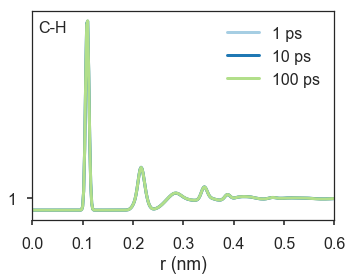

In [19]:
plt.rcParams['figure.figsize'] = (5, 4)
at_name = 'C_H'
for alp, d in sorted(avg_rdfs[at_name].items(), reverse=True):
    plt.plot(d[:, 0], d[:, 1], label='{:.0f} ps'.format(1.0/alp/1000), linewidth=3)
    plt.xlim([0, 0.6])
alps = sorted(avg_rdfs[at_name].keys())
rmses = []
for a1 in range(len(alps)):
    d1 = avg_rdfs[at_name][alps[a1]]
    for a2 in range(a1+1, len(alps)):
        d2 = avg_rdfs[at_name][alps[a2]]
        rmse = np.sqrt(np.average(pow(d2[:, 1]-d1[:, 1], 2)))
        rmses.append(rmse)
        print(alps[a1], alps[a2], rmse)
print(np.average(rmses))
plt.legend(loc=0)

plt.annotate(at_name.replace('_', '-'), xy=(0.02, 0.9), xycoords='axes fraction', fontsize=16)
plt.xlabel('r (nm)')
plt.yticks([1])
plt.tight_layout()
plt.savefig('ab2_rdf_c_h.pdf', dpi=200)

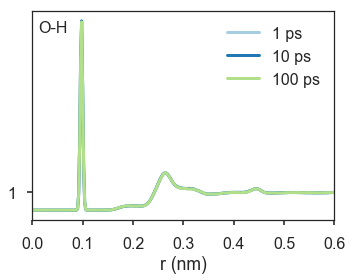

In [20]:
plt.rcParams['figure.figsize'] = (5, 4)
at_name = 'O_H'
for alp, d in sorted(avg_rdfs[at_name].items(), reverse=True):
    plt.plot(d[:, 0], d[:, 1], label='{:.0f} ps'.format(1.0/alp/1000), linewidth=3)
    plt.xlim([0, 0.6])
plt.legend(loc=0)
plt.annotate(at_name.replace('_', '-'), xy=(0.02, 0.9), xycoords='axes fraction', fontsize=16)
plt.xlabel('r (nm)')
plt.yticks([1])
plt.tight_layout()
plt.savefig('ab2_rdf_o_h.pdf', dpi=200)

1e-05 0.0001 0.0176464286482
1e-05 0.001 0.0218328618229
0.0001 0.001 0.0157176005944
0.0183989636885


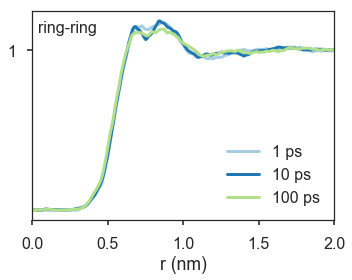

In [21]:
plt.rcParams['figure.figsize'] = (5, 4)
at_name = 'ring_ring'
for alp, d in sorted(avg_rdfs[at_name].items(), reverse=True):
    plt.plot(smooth(d[:, 0]), smooth(d[:, 1]), label='{:.0f} ps'.format(1.0/alp/1000), linewidth=3)
    plt.xlim([0, 2.0])
plt.legend(loc=4)
rmses = []
for a1 in range(len(alps)):
    d1 = smooth(avg_rdfs[at_name][alps[a1]][:, 1])
    for a2 in range(a1+1, len(alps)):
        d2 = smooth(avg_rdfs[at_name][alps[a2]][:, 1])
        rmse = np.sqrt(np.average(pow(d2-d1, 2)))
        rmses.append(rmse)
        print(alps[a1], alps[a2], rmse)
print(np.average(rmses))
plt.annotate(at_name.replace('_', '-'), xy=(0.02, 0.9), xycoords='axes fraction', fontsize=16)
plt.xlabel('r (nm)')
plt.yticks([1])
plt.tight_layout()
plt.savefig('ab2_rdf_ring_ring.pdf', dpi=200)